# Introductory Tutorial to scikit-learn for News Classification 

[scikit-learning](http://scikit-learn.org/stable/index.html) is an open-sourced simple and efficient tools for data mining, data analysis and machine learning in Python. It is built on [NumPy](https://numpy.org/), [SciPy](https://scipy.org/) and [matplotlib](https://matplotlib.org/). 

It expose interfaces for machine learning based classification, regression, and clustering models, as well as useful features like dimensionality reduction, evaluation and preprocessing.

It also implement a great set of features for Natural Language Processing (NLP), i.e. working with text data. Part one covers the following topics: loading data, simple preprocessing, training (supervised, semi-supervised, and unsupervised), and evaluation. Part two focuses on feature engineering and covers more advanced topics like feature extraction, building a pipeline, creating custom transformers, feature union, dimensionality reduction, etc. 

For this tutorial, we will use the [20 Newsgroups data set](http://qwone.com/~jason/20Newsgroups/) and perform topic classification.

### 1. Loading Dataset

We will use [pandas](https://pandas.pydata.org/) to read CSV file, just as a convention, considering that this library is the faster, and more flexible and easy to use open source data analysis and manipulation tool (to the best of my knowledge) built on top of the Python programming language.  

In [1]:
import pandas as pd

dataset = pd.read_csv('20news-18828.csv', header=None, delimiter=',', names=['label', 'text'])

Sanity check on the dataset.

In [2]:
print("There are 20 categories: %s" % (len(dataset.label.unique()) == 20))
print("There are 18828 records: %s" % (len(dataset) == 18828))

There are 20 categories: True
There are 18828 records: True


Now we need to split it to train set and test set. To do so, we can use the `train_test_split()` function. In scikit-learn's convention, X indicates data (yeah, uppercase X), and y indicates truths (and yeah, lowercase y). I mean, it doesn't really matter, as long as you remember what is what.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.text, dataset.label, train_size=0.8)

### 2. A Simple Example

Before going too much into preprocessing, feature extraction, and other more complicated tasks, we will do a relatively simple but complete example. In this example, we will use bag-of-words as features, and Naive Bayes as a classifier to establish our baseline.

There are some built-in vectorizers, `CountVectorizer` and `TfidfVectorizer` that we can use to vectorize our raw data and perform preprocessing and feature extraction on it. 

First, we will experiment with `CountVectorizer` which basically makes a token/ngram a feature and stores its count in the corresponding feature space. The `fit_transform()` function is the combination of `fit()` and `transform()`, and it's a more efficient implementation. `fit()` indexes the vocabulary/features, and `transform()` transforms the dataset into a matrix. 

#### Count Vectorizer
![SegmentLocal](countvectorizer.svg "segment")

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
# initialize a CountVectorizer
cv = CountVectorizer()

In [5]:
# WANTED ERROR
# print(list(cv.get_feature_names_out()))

In [6]:
# fit the raw data into the vectorizer and tranform it into a series of arrays
X_train_counts = cv.fit_transform(X_train)
X_train_counts.shape

(15062, 181007)

### Vocabulary generated

In [7]:
print(list(cv.get_feature_names_out()))

['00', '000', '0000', '00000', '000000', '00000000', '0000000004', '0000000005', '00000000b', '00000001', '00000001b', '0000000667', '00000010', '00000010b', '00000011', '00000011b', '0000001200', '00000074', '00000093', '000000e5', '00000100', '00000100b', '00000101', '00000101b', '00000110', '00000110b', '00000111', '00000111b', '000005102000', '000007', '00000ee5', '00001000', '00001000b', '00001001', '00001001b', '00001010', '00001010b', '00001011', '00001011b', '000010af', '00001100', '00001100b', '00001101', '00001101b', '00001110', '00001110b', '00001111', '00001111b', '000021', '000042', '000050', '000094', '0000vec', '0001', '00010000', '00010000b', '00010001', '00010001b', '00010010', '00010010b', '00010011', '00010011b', '000100255pixel', '00010100', '00010100b', '00010101', '00010101b', '00010110', '00010110b', '00010111', '00010111b', '00011000', '00011000b', '00011001', '00011001b', '00011010', '00011010b', '00011011', '00011011b', '00011100', '00011100b', '00011101', '00

### Example of vector

In [8]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize) # print the entire numpy array without truncation
print(X_train[0])
print(X_train_counts[0].toarray())

b'From: mathew <mathew@mantis.co.uk>\nSubject: Alt.Atheism FAQ: Atheist Resources\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-modified: 11 December 1992\nVersion: 1.0\n\n                              Atheist Resources\n\n                      Addresses of Atheist Organizations\n\n                                     USA\n\nFREEDOM FROM RELIGION FOUNDATION\n\nDarwin fish bumper stickers and assorted other atheist paraphernalia are\navailable from the Freedom From Religion Foundation in the US.\n\nWrite to:  FFRF, P.O. Box 750, Madison, WI 53701.\nTelephone: (608) 256-8900\n\nEVOLUTION DESIGNS\n\nEvolution Designs sell the "Darwin fish".  It\'s a fish symbol, like the ones\nChristians stick on their cars, but with feet and the word "Darwin" written\ninside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.\n\nWrite to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,\n           CA 91605.\n\nPeople in the San Francisco Bay area 

The same must be done for the test set, but we only need to use the `transform()` function to transform the test data into a matrix. 

In [9]:
X_test_counts = cv.transform(X_test)
X_test_counts.shape

(3766, 181007)

## Naive bayes

![SegmentLocal](naive_bayes_icon.png "segment")

Then, we fit our features and labels into a Naive Bayes classifier, which basically trains a model (if you fit the data more than once, it overwrites the parameters the model learns previously). After training, we can use it to perform prediction.

In [10]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train_counts, y_train)
predicted = clf.predict(X_test_counts)

In [11]:
# sample some of the predictions against the ground truths 
for idx, (article, prediction, truth) in enumerate(zip(X_test[:10], predicted[:10], y_test[:10])):
    print(f"---------------------------ARTICLE {idx}---------------------------")
    print(article) 
    print(f"\n\nClassifications {prediction} and real label is {truth}")
    print("---------------------------\n\n")

---------------------------ARTICLE 0---------------------------
b'From: jodfishe@silver.ucs.indiana.edu (joseph dale fisher)\nSubject: Re: tuff to be a Christian?\n\nIn article <Apr.17.01.10.58.1993.2246@geneva.rutgers.edu> mdbs@ms.uky.edu (no name) writes:\n>bissda@saturn.wwc.edu (DAN LAWRENCE BISSELL) writes:\n>\n>>\tI don\'t think most people understand what a Christian is.  It \n>>is certainly not what I see a lot in churches.  Rather I think it \n>>should be a way of life, and a total sacrafice of everything for God\'s \n>>sake.  He loved us enough to die and save us so we should do the \n>\n>\tTypical statement from an irrational and brainwashed person.\n>The bible was written by some male chavnist thousands of years ago\n>(as were all of the "holy" books). Follow the parts that you think are\n>suitable for modern life. Ignore the others. For heaven\'s (!) sake don\'t\n>take it literally.\n\nPlease, leave heaven out of it.  For his own sake, I pray that Dan does\ntake it literall

## Evaluation with Metrics

Let's do some legit evaluation. 

We will calculate:

* accuracy with the `accuracy_score()` function;

* precision, recall, and f1 using the `precision_recall_fscore_support()` function, which also takes into consideration the micro-averaged using.

* a general quantitative metric report with `classification_report()` function gives you precision, recall, and f1 scores for each label, and their average (at the macro level).

* Finally, the `confusion_matrix()` integrating matplotlib to visualize it along the labels can show you which labels are confusing to the model;

In [12]:
from sklearn import metrics

## Calculate accuracy

In [13]:
print(metrics.accuracy_score(y_test, predicted))

0.8446627721720659


## Calculate the entire classification report for every label

The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). 

In [14]:
print(metrics.classification_report(y_test, predicted, labels=dataset.label.unique()))

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.90      0.88       151
           comp.graphics       0.61      0.88      0.72       193
 comp.os.ms-windows.misc       0.97      0.19      0.32       191
comp.sys.ibm.pc.hardware       0.64      0.86      0.73       201
   comp.sys.mac.hardware       0.90      0.80      0.85       204
          comp.windows.x       0.83      0.89      0.86       208
            misc.forsale       0.95      0.61      0.74       198
               rec.autos       0.88      0.86      0.87       185
         rec.motorcycles       0.98      0.93      0.95       201
      rec.sport.baseball       0.99      0.94      0.97       198
        rec.sport.hockey       0.98      0.98      0.98       190
               sci.crypt       0.80      0.99      0.89       204
         sci.electronics       0.92      0.84      0.88       198
                 sci.med       0.93      0.90      0.92       196
         

# Calculate the micro-average 

Micro average (averaging the total true positives, false negatives, and false positives). In practice, it calculates metrics globally by counting the total true positives, false negatives, and false positives and not averaging by labels.



In [15]:
p, r, f1, _ = metrics.precision_recall_fscore_support(y_test, predicted, labels=dataset.label.unique(), average='micro')

print("Micro-averaged Performance:\nPrecision: {0}, Recall: {1}, F1: {2}".format(p, r, f1))

Micro-averaged Performance:
Precision: 0.8446627721720659, Recall: 0.8446627721720659, F1: 0.8446627721720659


## Plot Confusion Matrix

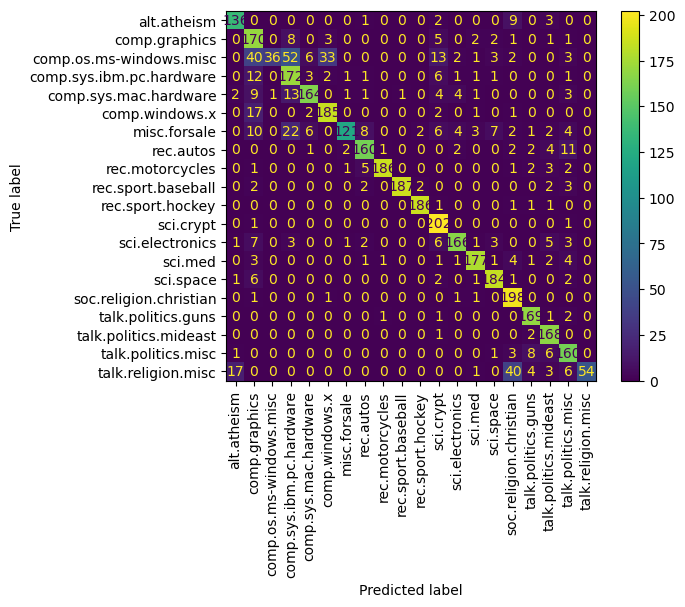

In [16]:
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, predicted, labels=dataset.label.unique())
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

### 3. Preprocessing & Feature Extraction

One may ask, "how do I remove stop words, tokenize the texts differently, or use bigrams/trigrams as features?" 
The answer is you can do all that with a [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object, i.e. you can pass various arguments to the constructor. 

Here are some of them: `ngram_range` takes in a tuple (n_min, n_max). For example, `(2,2)` means only use bigrams, and `(1,3)` means use unigrams, bigrams, and trigrams. `stop_words` takes in a list of stopwords that you'd like to remove. If you want to use default stopword list in scikit-learn, pass in the string `'english'`. `tokenizer` is a function that takes in a string and returns a string, inside that function, you can define how to tokenize your text. By default, scikit-learn tokenization pattern is `u'(?u)\b\w\w+\b'`. Finally, `preprocessor` takes in a function of which the argument is a string and the output is a string. You can use it to perform more customized preprocessing. For more detail, please checkout the documentation for `CountVectorizer` or `TfidfVectorizer`.

Let's start with defining a preprocessor to normalize all the numeric values, i.e. replacing numbers with the string `NUM`. Then, we construct a new `CountVectorizer`, and then use unigrams, bigrams, and trigrams as features, and remove stop words.  

In [17]:
import re
def normalize_numbers(s):
    return re.sub(r'\b\d+\b', 'NUM', s)

cv = CountVectorizer(preprocessor=normalize_numbers, ngram_range=(1,3), stop_words='english')

Let's fit and transform the train data and transform the test data. The speed of preprocessing and feature extraction depends on the running time of each step. For example, the running time of stopword removal is O(N * M), where N is the vocabulary size of the document, and M is the stopword list size.

In [18]:
# fit the raw data into the vectorizer and tranform it into a series of arrays
X_train_counts = cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)

Let's use the Naive Bayes classifier to train a new model and see if it works better. From the last section with out preprocessing or feature engineering, our precison, recall and F1 are in the mid 80s, but now we got 90 for each score.

In [19]:
clf = MultinomialNB().fit(X_train_counts, y_train)
predicted = clf.predict(X_test_counts)
print(metrics.classification_report(y_test, predicted, labels=dataset.label.unique()))

                          precision    recall  f1-score   support

             alt.atheism       0.91      0.97      0.94       151
           comp.graphics       0.70      0.89      0.78       193
 comp.os.ms-windows.misc       0.88      0.74      0.80       191
comp.sys.ibm.pc.hardware       0.78      0.86      0.82       201
   comp.sys.mac.hardware       0.94      0.81      0.87       204
          comp.windows.x       0.87      0.90      0.88       208
            misc.forsale       0.92      0.77      0.84       198
               rec.autos       0.93      0.94      0.93       185
         rec.motorcycles       0.97      0.93      0.95       201
      rec.sport.baseball       0.99      0.93      0.96       198
        rec.sport.hockey       0.90      0.99      0.94       190
               sci.crypt       0.93      0.99      0.96       204
         sci.electronics       0.94      0.82      0.88       198
                 sci.med       0.94      0.91      0.92       196
         

# TF-IDF Vectorizer

Do you remember there are other vectorizers that you can use? one of them is `TfidfVecotrizer`. LOL, what is tf-idf? 

It reflects how important a word/phrase is to a document in a corpus. The constructor of `TfidfVectorizer` takes in the same parameters as that of `CountVectorizer`, so you can perform the same preprocessing/feature extraction. 

Try to run the following block of code and see if using tf-idf will help improve the performance. There are some other parameters in the constructor that you can tweak when initializing the object, and they could affect the performance as well.   

![SegmentLocal](tf-idf.png "segment")

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(preprocessor=normalize_numbers, ngram_range=(1,3), stop_words='english')
X_train_tf = tv.fit_transform(X_train)
X_test_tf = tv.transform(X_test)
clf2 = MultinomialNB().fit(X_train_tf, y_train)
predicted = clf2.predict(X_test_tf)
print(metrics.classification_report(y_test, predicted, labels=dataset.label.unique()))

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.95      0.92       151
           comp.graphics       0.82      0.79      0.81       193
 comp.os.ms-windows.misc       0.81      0.86      0.83       191
comp.sys.ibm.pc.hardware       0.77      0.87      0.82       201
   comp.sys.mac.hardware       0.94      0.84      0.89       204
          comp.windows.x       0.93      0.88      0.91       208
            misc.forsale       0.90      0.82      0.86       198
               rec.autos       0.88      0.93      0.90       185
         rec.motorcycles       0.95      0.96      0.95       201
      rec.sport.baseball       0.96      0.94      0.95       198
        rec.sport.hockey       0.90      0.98      0.94       190
               sci.crypt       0.93      0.99      0.96       204
         sci.electronics       0.93      0.82      0.87       198
                 sci.med       0.97      0.90      0.93       196
         

Alternatively, if you like typing a longer block of code, you can use the `TfidfTransformer` to transform a word count matrix created by `CountVectorizer` into a tf-idf matrix.

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

### 4. Model Selection: Test other classifiers rather than naive bayes

Depending on the size of your data and the nature of your task, some classifiers might perform better than others. 

Let's try the [logistic regression classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) in sci-kit-learn (Maxent and logistic regression are virtually the same thing). 

Please note that this classifier is a lot slower than Naive Bayes, because it is iteratively optimized, while the NB is based on statical probabilities calculated once and for all.

In [22]:
from sklearn.linear_model import LogisticRegression

# for the sake of speed, we will just use all the default value of the constructor
cv = CountVectorizer()
X_train_counts = cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)

clf = LogisticRegression(solver='liblinear', max_iter=500, n_jobs=4)
clf.fit(X_train_counts, y_train)
predicted = clf.predict(X_test_counts)
print(metrics.classification_report(y_test, predicted, labels=dataset.label.unique()))

C:\ProgramData\anaconda3\envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


                          precision    recall  f1-score   support

             alt.atheism       0.94      0.91      0.93       151
           comp.graphics       0.80      0.85      0.83       193
 comp.os.ms-windows.misc       0.83      0.84      0.84       191
comp.sys.ibm.pc.hardware       0.81      0.82      0.82       201
   comp.sys.mac.hardware       0.90      0.86      0.88       204
          comp.windows.x       0.90      0.88      0.89       208
            misc.forsale       0.87      0.87      0.87       198
               rec.autos       0.90      0.91      0.90       185
         rec.motorcycles       0.97      0.94      0.96       201
      rec.sport.baseball       0.97      0.95      0.96       198
        rec.sport.hockey       0.95      0.99      0.97       190
               sci.crypt       0.97      0.97      0.97       204
         sci.electronics       0.85      0.90      0.87       198
                 sci.med       0.91      0.93      0.92       196
         

## Unsupervised Machine Learning: Clustering 

Clustering algorithms, which amount to a class of unsupervised ML models have great value in NLP, particularly for tasks like news segmentation, where it was adopted to efficiently organize large volumes of news articles into coherent and meaningful clusters, enabling streamlined analysis and retrieval of relevant information.

<!-- In general, NLP Clustering involves grouping similar data points based on their features or characteristics identifying patterns and similarities among textual data, facilitating tasks such as document organization, topic modeling, and sentiment analysis.  -->

### KMeans Algorithm

KMeans is a popular clustering algorithm widely used in NLP for its simplicity and efficiency. It iteratively partitions the data into a predefined number of clusters, with each cluster represented by its centroid. By iteratively optimizing the cluster centroids to minimize the within-cluster sum of squares, KMeans efficiently groups similar documents together while maximizing the differences between clusters.

In news segmentation, K-means clustering organizes vast amounts of news articles into cohesive groups based on shared topics, events, or themes. 

This segmentation enables efficient content recommendation, targeted advertising, and trend analysis. Moreover, by automatically clustering news articles, NLP systems can adapt to dynamic news environments, ensuring timely and relevant content delivery to users.

![SegmentLocal](K-means_convergence.gif "segment")

### Perform KMeans with sklearn

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(dataset.text, dataset.label, train_size=0.8)

# I reduced the number of features here just to make training a little faster
cv = CountVectorizer()

X_train_counts = cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)

kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(X_train_counts)

# see the cluster label for each instance
# print(kmeans.labels_)
# print(kmeans.predict(X_test_counts))

le = preprocessing.LabelEncoder() # encode original label as integer just to check general performances
le.fit(y_train)

# you can also pass in the labels, if you have some annotated data
kmeans.fit(X_train_counts, le.transform(y_train))
predicted = kmeans.predict(X_test_counts)

## plot results
p, r, f1, _ = metrics.precision_recall_fscore_support(le.transform(y_test), predicted, average='macro')
print("Macro-averaged Performance:\nPrecision: {0}, Recall: {1}, F1: {2}".format(p, r, f1))

C:\ProgramData\anaconda3\envs\NLP\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 6. Conclusion
In this tutorial, we went through some basic features of scikit-learn that allow us to perform a basic ML NLP classification task, obtaining interesting results on a toy dataset.

As self-study, you could investigate how transfomers have revolutionized NLP classification ([Interesting research paper](https://ieeexplore.ieee.org/document/10380590)). 